DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
                                               Run Sample Treatment
0   Fozzie_20240405_RJK_HS_SRPAID_1_20240405115257   54_1       54-
1                  Fozzie_20240405_RJK_HS_SRPAID_3   54_3       54

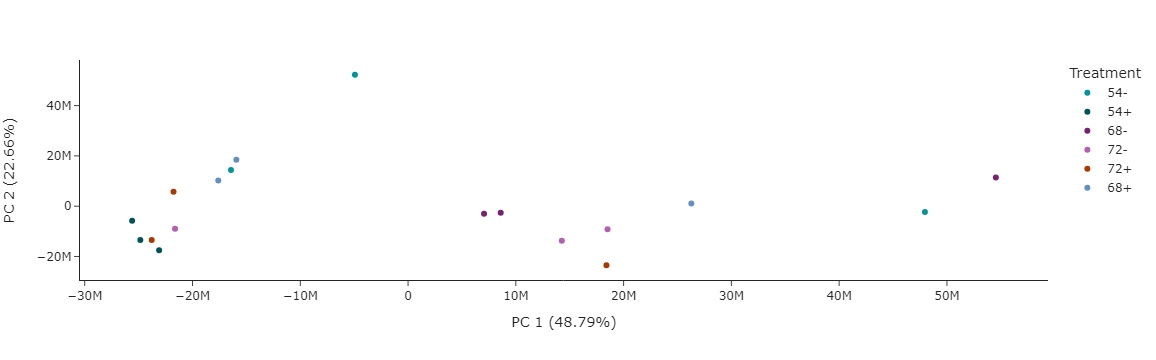

In [29]:

import alphastats 
import pandas as pd
import matplotlib as plt
import plotly.express as px


def generate_alphastats_objects(path, meta):
    meta_file = pd.read_csv(meta, sep=',')
    path = f'{path}/protein_groups/'
    intensity_cols = meta_file['Sample'].values.tolist()
    # loader_total = alphastats.GenericLoader(f"{path}total.csv", 
    #                                   intensity_column = intensity_cols,
    #                                     index_column="Protein.Group")

    loader_nsp = alphastats.GenericLoader(f"{path}nsp.csv", 
                                      intensity_column = intensity_cols,
                                        index_column="Protein.Group")

    loader_light = alphastats.GenericLoader(f"{path}light.csv", 
                                      intensity_column = intensity_cols,
                                        index_column="Protein.Group")

    # df_total = alphastats.DataSet(
    #     loader = loader_total,
    #     metadata_path = meta,
    #     sample_column = 'Sample')

    df_light = alphastats.DataSet(
        loader = loader_light,
        metadata_path = meta,
        sample_column = 'Sample')

    df_nsp = alphastats.DataSet(
        loader = loader_nsp,
        metadata_path = meta,
        sample_column = 'Sample')


    
    return df_nsp, df_light  #, df_total

meta = 'G:/My Drive/Data/data/20240410 SRP AID/meta.csv'
path = 'G:/My Drive/Data/data/20240410 SRP AID/'

nsp, light = generate_alphastats_objects(path, meta)
#light._normalization('zscore')
print(light.metadata)
nsp.plot_pca('Treatment').show()
